In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import os
import cv2
import wandb
import fastai
from fastai.callbacks import CSVLogger
from fastai.vision import *
from bengaliai.config import *
from bengaliai.data import get_train, create_train_images, BengaliAIDataset
import click
from bengaliai.models import Loss_combine

In [6]:
train_df, labels = get_train()

print(train_df.shape)

(200840, 5)


In [4]:
fold = 0
data = (
    ImageList.from_df(
        train_df,
        path=DATA_DIR,
        folder="train",
        suffix=".png",
        cols="image_id",
        convert_mode="L",
    )
    .split_by_idx(
        range(fold * len(train_df) // folds, (fold + 1) * len(train_df) // folds)
    )
    .label_from_df(cols=label_names)
    .transform(
        get_transforms(do_flip=False, max_warp=0.1), size=size, padding_mode="zeros"
    )
    .databunch(bs=batchsize)
).normalize(stats)

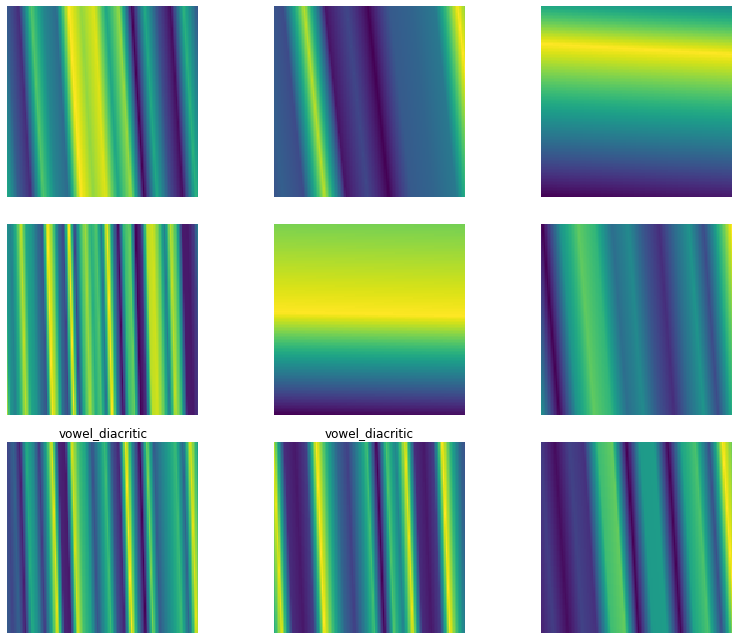

In [5]:
data.show_batch(rows=3, figsize=(12,9))

In [ ]:
arch = models.resnet50

In [ ]:
acc_02 = partial(accuracy_thresh, thresh=0.2)

In [ ]:
learn = cnn_learner(data, arch, metrics=[acc_02])